In [366]:
import numpy as np
import matplotlib as plt
import pandas as pd
import csv
import seaborn as sns
import datetime
from datetime import timedelta
from colorama import init, Fore, Back, Style


# Abrimos los ficheros 

In [367]:
# Abrimos el fichero:
path =(r"D:\Documentos D\02.- Datos Vueling\2022.06.03 2022_delay + cierre puertas.xlsx")


# QUITAR # Para coger un fichero más pequeño
path =(r"D:\Documentos D\02.- Datos Vueling\2022.06.03 2022_delay + cierre puertas CORTO.xlsx")
Hoja = 'FLT_2022'
df = pd.read_excel(path, sheet_name=Hoja)

ValueError: Worksheet named 'FLT_2022' not found

In [ ]:
df['Secuencia'] = df.groupby(['DATE', 'REG'])['STD'].rank()
print(df[['Secuencia','STD', 'DEP']][0:4])

In [ ]:
print(Style.BRIGHT +Fore.BLUE+'Hola' )
print('LLLLLL')

In [ ]:
print(Hoja)

In [ ]:
# Identifico los Aeropuertos principales.


path =(r"D:\Documentos D\02.- Datos Vueling\Flights Movement 2019-2022 MAR.xlsx")
df_Aeropuertos = pd.read_excel(path, sheet_name='Aeropuertos')
df_Aeropuertos = df_Aeropuertos.drop(['Borrar'], axis=1)

#df_Aeropuertos.head



In [ ]:
#df.dtypes

In [ ]:
# Convierto todas las columnas de tiempo en un formato correcto

formato = "%H:%M:%S"


def convertirTiempo(clave):
    df[clave] = pd.to_datetime(df[clave],
                               format=formato,
                               errors='coerce')


columnasConvertir = ['DATE', 'STD', 'STA', 'Tkof', 'TDwn', 'ATD', 'ATA', 'BLOCK', 'FLThr', 'Taxi-out', 'Taxi-In',
                     'DLY1Arr', 'Close Pax Door', 'Close Cargo Door', 'Open Cargo/Pax Door', 'close pax door2', 'close cargo door2', 'open cargo/pax door2',
                     'SLOT', 'DLY1', 'DLY2']

for x in columnasConvertir:
    convertirTiempo(x)
    # print(x)
# df.dtypes
df.head()

In [ ]:
#Subrutina que suma las fechas con las horas.
def adecuarFechas(fecha, tiempoClave):
    clave = "Date_" + tiempoClave
    print('.....Clave: ',clave, '....', fecha, tiempoClave)     
    df[tiempoClave] = pd.to_datetime(df[tiempoClave], format='%H:%M', errors='coerce')       
    
    df[tiempoClave] = pd.to_datetime( df[fecha].dt.strftime('%d/%m/%Y') + ' ' + df[tiempoClave].dt.strftime('%H:%M:%S'))

In [ ]:
#df1=df.copy()
print(df['STD'].head())
columnasAddDate= ['STD', 'STA', 'Tkof', 'TDwn', 'ATD', 'ATA', 'BLOCK', 'FLThr','Taxi-out',
                  'Taxi-In','DLY1Arr',  'SLOT', 'DLY1', 'DLY2', 'close pax door2', 'close cargo door2']
 
for x in columnasAddDate:    
    adecuarFechas('DATE', x)


In [ ]:
#Agrupo por aeropuerto de Salida

df1['MES'] = df['STD'].dt.month

# Convierto todas las columnas de tiempo en un formato correcto

# Identificacion de los principales Aeropuertos

In [368]:
df= pd.merge(df,df_Aeropuertos, left_on= 'DEP', right_on='Dep')

df= pd.merge(df,df_Aeropuertos, left_on= 'ARR', right_on='Dep')


df= df.rename({'AeropuertoKey1_x': 'Aeropuerto_Key', 'AeropuertoKey1_y': 'AeropuertoKey1'}, axis=1)

df= df.sort_values(['DATE', 'REG', 'STD'])
df= df.reset_index(drop=True)
borrarColumnas = ['Dep_x', 'Dep_y']
df = df.drop(borrarColumnas, axis=1)
df.head(4)

,DATE,FLT,REG,AC,DEP,ARR,STD,STA,Tkof,TDwn,...,Trayecto,E_Despegue,Aeropuerto_Key,Aeropuerto_Key,Aeropuerto_Key,Aeropuerto_Key,Aeropuerto_Key,Aeropuerto_Key,AeropuertoKey1,AeropuertoKey1
0,2022-01-01,2506,EC-JSY,320,BIO,BCN,2022-01-01 07:40:00,2022-01-01 09:05:00,2022-01-01 08:10:00,2022-01-01 09:17:00,...,BCN-BIO,20.0,BIO,BCN,BIO,BCN,BIO,BCN,BIO,BCN
1,2022-01-01,2505,EC-JSY,320,BCN,BIO,2022-01-01 09:40:00,2022-01-01 11:05:00,2022-01-01 10:03:00,2022-01-01 11:07:00,...,BCN-BIO,11.0,BCN,BIO,BCN,BIO,BCN,BIO,BCN,BIO
2,2022-01-01,1386,EC-JSY,320,BIO,SCQ,2022-01-01 11:40:00,2022-01-01 12:50:00,2022-01-01 11:50:00,2022-01-01 12:40:00,...,BIO-SCQ,0.0,BIO,SCQ,BIO,SCQ,BIO,SCQ,BIO,SCQ
3,2022-01-01,1387,EC-JSY,320,SCQ,BIO,2022-01-01 13:30:00,2022-01-01 14:35:00,2022-01-01 13:30:00,2022-01-01 14:08:00,...,BIO-SCQ,-7.0,SCQ,BIO,SCQ,BIO,SCQ,BIO,SCQ,BIO


# Calculo tiempo en vuelo 1

In [369]:
df.columns
print(df['Close Pax Door'])

0    2022-01-01 07:58:00
1    2022-01-01 09:48:00
2    2022-01-01 11:38:00
3    2022-01-01 13:18:00
4    2022-01-01 15:07:00
5    2022-01-01 18:51:00
6    2022-01-01 07:11:00
7    2022-01-01 09:23:00
8    2022-01-01 11:38:00
9    2022-01-01 14:11:00
10   2022-01-01 17:08:00
11   2022-01-01 19:53:00
12   2022-01-01 14:22:00
13   2022-01-01 16:40:00
14   2022-01-01 18:53:00
15   2022-01-01 20:14:00
16   2022-01-01 07:43:00
17   2022-01-01 11:28:00
18   2022-01-01 15:01:00
19   2022-01-01 16:58:00
Name: Close Pax Door, dtype: datetime64[ns]


In [370]:
# Calulo tiempo de vuelo teorico Real y error
df['DuracionVueloTeorico']= (df['STA'] - df['STD'])/  np.timedelta64(1, 'm') 
df['DuracionVueloReal'] = (df['ATA'] - df['ATD']) /  np.timedelta64(1, 'm') 
df['E_Duracion_Vuelo'] = (df['DuracionVueloReal'] - df['DuracionVueloTeorico']) #/  np.timedelta64(1, 'm') 
df['E_Duracion_Vuelo'].head(3)

0   -5.0
1   -7.0
2   -5.0
Name: E_Duracion_Vuelo, dtype: float64

# Tiempo Close Pax y Close Cargo Door

In [371]:
df['Close Pax Door']

0    2022-01-01 07:58:00
1    2022-01-01 09:48:00
2    2022-01-01 11:38:00
3    2022-01-01 13:18:00
4    2022-01-01 15:07:00
5    2022-01-01 18:51:00
6    2022-01-01 07:11:00
7    2022-01-01 09:23:00
8    2022-01-01 11:38:00
9    2022-01-01 14:11:00
10   2022-01-01 17:08:00
11   2022-01-01 19:53:00
12   2022-01-01 14:22:00
13   2022-01-01 16:40:00
14   2022-01-01 18:53:00
15   2022-01-01 20:14:00
16   2022-01-01 07:43:00
17   2022-01-01 11:28:00
18   2022-01-01 15:01:00
19   2022-01-01 16:58:00
Name: Close Pax Door, dtype: datetime64[ns]

In [372]:
df['Close Pax Door'] =pd.to_datetime(df['Close Pax Door'])
print(df['Close Pax Door'].head(4))
print('-----------------')
print(df1['ATD'].head(4))

0   2022-01-01 07:58:00
1   2022-01-01 09:48:00
2   2022-01-01 11:38:00
3   2022-01-01 13:18:00
Name: Close Pax Door, dtype: datetime64[ns]
-----------------
0   2022-01-01 08:00:00
1   2022-01-01 09:51:00
2   2022-01-01 11:40:00
3   2022-01-01 13:23:00
Name: ATD, dtype: datetime64[ns]


In [373]:
df['Close Pax Door'] =pd.to_datetime(df['Close Pax Door'])
df['t_ClosePax'] =   (df['Close Pax Door'] - df['ATD']) /  np.timedelta64(1, 'm') 
df['t_ClosePax']

0     -2.0
1     -3.0
2     -2.0
3     -5.0
4      0.0
5      0.0
6     -1.0
7      0.0
8     -1.0
9     -3.0
10     0.0
11    -5.0
12    -5.0
13     0.0
14    -1.0
15    -2.0
16   -30.0
17    -2.0
18     0.0
19    -1.0
Name: t_ClosePax, dtype: float64

In [374]:
df ['Close Cargo Door']=pd.to_datetime(df ['Close Cargo Door'])
df['t_Close_Cargo_Door'] = (df ['Close Cargo Door'] - df['ATD']) /  np.timedelta64(1, 'm') 

df['Close Pax Door'] =pd.to_datetime(df['Close Pax Door'])
df ['Close Cargo Door']=pd.to_datetime(df ['Close Cargo Door'])

df['t_Entre_Puertas'] = (df ['Close Cargo Door'] - df['Close Pax Door']) /  np.timedelta64(1, 'm') 
df[[ 't_ClosePax','t_Close_Cargo_Door', 't_Entre_Puertas'] ].head(4)

,t_ClosePax,t_Close_Cargo_Door,t_Entre_Puertas
0,-2.0,-29.0,-27.0
1,-3.0,-5.0,-2.0
2,-2.0,-6.0,-4.0
3,-5.0,-17.0,-12.0


In [375]:
df ['Close Cargo Door']

0    2022-01-01 07:31:00
1    2022-01-01 09:46:00
2    2022-01-01 11:34:00
3    2022-01-01 13:06:00
4    2022-01-01 15:01:00
5    2022-01-01 18:46:00
6    2022-01-01 07:07:00
7    2022-01-01 09:19:00
8    2022-01-01 11:39:00
9    2022-01-01 14:14:00
10   2022-01-01 17:03:00
11   2022-01-01 19:58:00
12   2022-01-01 14:27:00
13   2022-01-01 16:37:00
14   2022-01-01 18:51:00
15   2022-01-01 20:12:00
16   2022-01-01 07:40:00
17   2022-01-01 11:29:00
18   2022-01-01 15:00:00
19   2022-01-01 16:45:00
Name: Close Cargo Door, dtype: datetime64[ns]

In [376]:
df['t_Close_Cargo_Door']

0    -29.0
1     -5.0
2     -6.0
3    -17.0
4     -6.0
5     -5.0
6     -5.0
7     -4.0
8      0.0
9      0.0
10    -5.0
11     0.0
12     0.0
13    -3.0
14    -3.0
15    -4.0
16   -33.0
17    -1.0
18    -1.0
19   -14.0
Name: t_Close_Cargo_Door, dtype: float64

In [377]:
# Estudio los trayectos.
condicion = [(df['DEP'] < df['ARR']),  (df['ARR'] < df['DEP'])]

valores = [  (df['DEP'] + '-' + df['ARR']),  (df['ARR'] + '-' + df['DEP'])]

df['Trayecto'] = np.select(condicion, valores ) 
df['Trayecto'].head(4)

#df5 = df.where('Departure' > 'Arrival',  'Departure' + 'Arrival',  'Arrival' +'Departure')

0    BCN-BIO
1    BCN-BIO
2    BIO-SCQ
3    BIO-SCQ
Name: Trayecto, dtype: object

In [378]:
# Creo la secuencia de vuelos de cada avión cada día

df['Secuencia'] = df.groupby(['DATE', 'REG'])['STD'].rank()


df1=df
df1.head(2)



,DATE,FLT,REG,AC,DEP,ARR,STD,STA,Tkof,TDwn,...,Trayecto,E_Despegue,Aeropuerto_Key,Aeropuerto_Key,Aeropuerto_Key,Aeropuerto_Key,Aeropuerto_Key,Aeropuerto_Key,AeropuertoKey1,AeropuertoKey1
0,2022-01-01,2506,EC-JSY,320,BIO,BCN,2022-01-01 07:40:00,2022-01-01 09:05:00,2022-01-01 08:10:00,2022-01-01 09:17:00,...,BCN-BIO,20.0,BIO,BCN,BIO,BCN,BIO,BCN,BIO,BCN
1,2022-01-01,2505,EC-JSY,320,BCN,BIO,2022-01-01 09:40:00,2022-01-01 11:05:00,2022-01-01 10:03:00,2022-01-01 11:07:00,...,BCN-BIO,11.0,BCN,BIO,BCN,BIO,BCN,BIO,BCN,BIO


In [379]:
# Analizo el retardo en el despegue:
def dibujarScatter( ejeX, ejeY):
    x= df1[ejeX]
    y = df1[ejeY]    
    ax = sns.scatterplot(x , y )



# Puntualidad media primer despegue en el 2019!

C:\Users\jmmat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


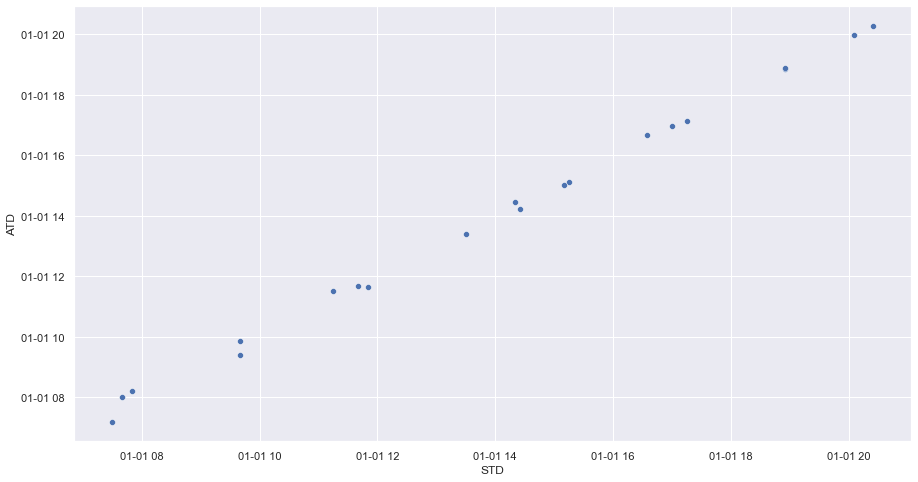

In [380]:
ax = sns.scatterplot( df1['STD'], df1['ATD'])

# Calculo error del primer despegue.

In [381]:
# Filtro primer despegue

vuelosPrimerDespegue= (df1['Secuencia']== 1)
df2 = df1[vuelosPrimerDespegue]
print(df2[['DATE','REG', 'Secuencia','STD']][0:8])


         DATE     REG  Secuencia                 STD
0  2022-01-01  EC-JSY        1.0 2022-01-01 07:40:00
6  2022-01-01  EC-JZI        1.0 2022-01-01 07:30:00
12 2022-01-01  EC-KDG        1.0 2022-01-01 14:20:00
16 2022-01-01  EC-KDH        1.0 2022-01-01 07:50:00


In [382]:

#Calculo error despegue:
'''
vuelosPrimerDespegue= (df1['Secuencia']== 1)
df2 = df1[vuelosPrimerDespegue]

df2['E_Despegue'] = (df2['Date_ATD']- df2['Date_STD']) /  np.imedelta64(1, 'm')


#df2['E_Despegue']=df2['E_Despegue'].np.time

df2['E_Despegue'].head(8)
print(df2[['DATE','REG', 'E_Despegue', 'Date_ATD', 'Date_STD']][0:8])
#sns.histplot(data= df1.E_Despegue, kde= True)
'''

"\nvuelosPrimerDespegue= (df1['Secuencia']== 1)\ndf2 = df1[vuelosPrimerDespegue]\n\ndf2['E_Despegue'] = (df2['Date_ATD']- df2['Date_STD']) /  np.imedelta64(1, 'm')\n\n\n#df2['E_Despegue']=df2['E_Despegue'].np.time\n\ndf2['E_Despegue'].head(8)\nprint(df2[['DATE','REG', 'E_Despegue', 'Date_ATD', 'Date_STD']][0:8])\n#sns.histplot(data= df1.E_Despegue, kde= True)\n"

In [383]:
#Calculo error primer despegue despegue:

df1['E_Despegue'] = (df1['ATD']- df1['STD']) /  np.timedelta64(1, 'm')

 
df1['E_Despegue'].head()
 

#print(df1['E_Despegue'][0], '-----', df1['Date_ATD'][0], '........', df1['Date_STD'][0])
#print(df1[['DATE','REG', 'E_Despegue', 'Date_ATD', 'Date_STD']][0:8])

print(df2[['DATE','REG', 'Secuencia','STD', 'ATD']][0:8])

print('Media = ', df1['E_Despegue'].mean())

         DATE     REG  Secuencia                 STD                 ATD
0  2022-01-01  EC-JSY        1.0 2022-01-01 07:40:00 2022-01-01 08:00:00
6  2022-01-01  EC-JZI        1.0 2022-01-01 07:30:00 2022-01-01 07:12:00
12 2022-01-01  EC-KDG        1.0 2022-01-01 14:20:00 2022-01-01 14:27:00
16 2022-01-01  EC-KDH        1.0 2022-01-01 07:50:00 2022-01-01 08:13:00
Media =  -1.45


<AxesSubplot:xlabel='E_Despegue', ylabel='Count'>

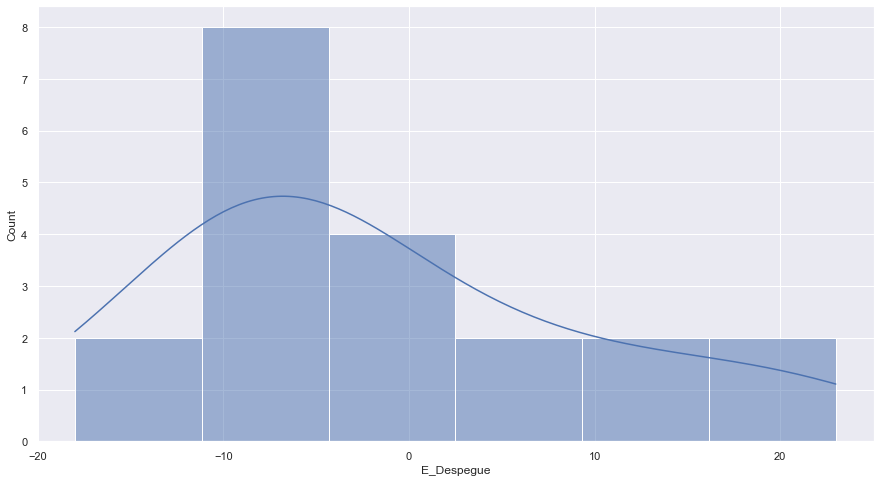

In [384]:
sns.histplot(data= df1.E_Despegue, kde= True)

# Vemos que hay mucha dispersion hay que filtrar los datos a:
## error de salida > 30 y < 30 y es el primer despegue


Media filtrada =  -1.45 minutos
    Secuencia  E_Despegue AeropuertoKey1 AeropuertoKey1
0         1.0        20.0            BIO            BCN
6         1.0       -18.0            SVQ            PMI
12        1.0         7.0            BCN            AGP
16        1.0        23.0            BIO           otro


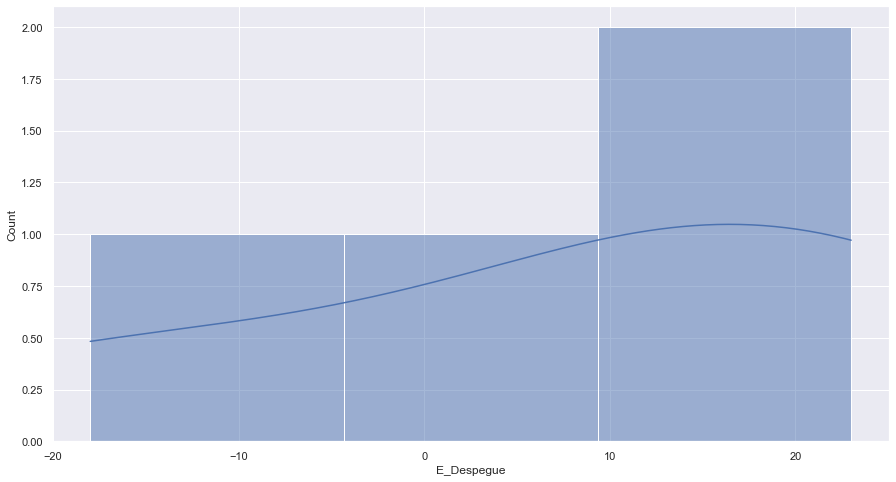

In [385]:
# Eliminar los outliers
df2=df.copy()
dfEliminarOutliers= ((df2['Secuencia']== 1) & (df2['E_Despegue']< 30) & (df2['E_Despegue']> -30))

df2 = df[dfEliminarOutliers]
sns.histplot(data= df2.E_Despegue, kde= True)
print()
print('Media filtrada = ', round(df1['E_Despegue'].mean(),2), 'minutos')
print(df2[['Secuencia', 'E_Despegue', 'AeropuertoKey1' ]]) 

In [392]:
# Para saber la puntualidad solo de Barcelona
barcelonaPuntualidad = (df2['AeropuertoKey1']== 'BCN')
barcelonaPuntualidad

#df2BarcelonaPuntualida = df[barcelonaPuntualidad ]
#df2BarcelonaPuntualida.head()
#puntualidadBCN = round((df2BarcelonaPuntualida['E_Despegue'].mean()),2)
print(df2BarcelonaPuntualida[[ 'DATE',   'FLT',     'REG',  'AC', 'DEP',  'ARR']] )

KeyError: "['AC'] not in index"

In [387]:
# Intervalos de Confianza por aeropuerto
sns.set_theme(style="darkgrid")
#tips = sns.df1("tips")
sns.set(rc = {'figure.figsize':(15,8)})      
# Tamaño de la imagen
ax = sns.pointplot(x='AeropuertoKey1', y = "E_Despegue", data= df2, scale=.1, kind = "point", capsize=0.13)

ax.axhline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axhline(0, color="green", linestyle = '--')


textoBCN = "BCN "+ str(puntualidadBCN) + ' minut.'
ax.text(puntualidadBCN ,puntualidadBCN , textoBCN, backgroundcolor='w')

ax.set_title('Puntualidad principales aeropuertos:', fontsize = 24)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

# tiempo 'Close Cargo Door'  -   'Close Pax'

In [ ]:
#t_Close_Cargo_Door

dfEliminarOutliers= ((df1['Secuencia']== 1) & (df1['t_Close_Cargo_Door']< 30) & (df1['t_Close_Cargo_Door']> -30))

df2 = df2[dfEliminarOutliers]
#df2 = df2[dfEliminarOutliers]

ax=sns.histplot(data= df2.t_Close_Cargo_Door, kde= True)

media = round(df1['t_Close_Cargo_Door'].mean(),2)
print()
print('Media filtrada = ', media , 'minutos')
 
ax.axvline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')


# tiempo  'tiempo Close Pax'  -   'ATD'

In [ ]:
#t_Close_Cargo_Door

dfEliminarOutliers= ((df1['Secuencia']== 1) & (df1['t_ClosePax']< 30) & (df1['t_ClosePax']> -30))

df2 = df2[dfEliminarOutliers] 

ax=sns.histplot(data= df2.t_Close_Cargo_Door, kde= True)

media = round(df1['t_ClosePax'].mean(),2)
print()
print('Media filtrada = ', media , 'minutos')
 
ax.axvline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')


In [ ]:
ax=sns.histplot(data= df2BarcelonaPuntualida.E_Despegue, kde= True)

ax.axvline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')


# creamos los LAGs

In [ ]:
#Creamos los LAGs

df[f'lag_STD']= df['STD'].shift(periods=-1)  
#adecuarFechas('DATE', 'lag_STD')
df[f'lag_ATD']= df['ATD'].shift(periods=-1)  

df[f'lag_STA']= df['STA'].shift(periods=-1)  
#adecuarFechas('DATE', 'lag_STD')
df[f'lag_ATA']= df['ATA'].shift(periods=-1) 


#df

# Tiempo en tierra de una avion despues primer salto
##df3 --> Calculo tiempo en tierra

In [ ]:
df= df.sort_values(['Flight Date', 'Tail', 'STD'])



df['T_teoricoTierra1'] = (df['lag_STD']- df['STA']) /  np.timedelta64(1, 'm')
df['T_RealTierra1'] = (df['lag_ATD']- df['ATA']) /  np.timedelta64(1, 'm')


#df['T_teoricoTierra1'] = (df['lag_STD']- df['STA']) 
#df['T_RealTierra1'] = (df['lag_ATD']- df['ATA']) 
df['E_tierra1'] = df['T_RealTierra1'] -df['T_teoricoTierra1']


#df[f'lag_STD']= df['STD'].shift(periods=-1)  


df3=df
#selecionoSecuencia_1= (df['Secuencia']== 1)
#df3 = df[selecionoSecuencia_1]


#print(df3[['DATE','REG', 'Secuencia']][0:8])

print(df3[['Tail', 'Secuencia','STD', 'ATD', 'lag_STD', 'T_teoricoTierra1', 'E_tierra1']][0:4])
print()
print('Media filtrada = ', round(df3['E_tierra1'].mean(),2), 'minutos')


In [ ]:
# Retraso
df['Puntualidad1'] = (df['ATA'] - df['STA']) /  np.timedelta64(1, 'm') 
df['Puntualidad1'].head(3)

# Creamos los LAG siguientes saltos

In [ ]:
df.columns

In [ ]:
#Creamos los LAGs
df[f'E_Despegue2']= df['E_Despegue'].shift(periods=-1) 
df[f'E_Despegue3']= df['E_Despegue'].shift(periods=-2) 

df[f'E_Duracion_Vuelo2']= df['E_Duracion_Vuelo'].shift(periods=-1) 
df[f'E_Duracion_Vuelo3']= df['E_Duracion_Vuelo'].shift(periods=-2) 

df[f'E_tierra2']= df['E_tierra1'].shift(periods=-1) 
df[f'E_tierra3']= df['E_tierra1'].shift(periods=-2) 

df[f'Aeropuerto_Key2']= df['Aeropuerto_Key'].shift(periods=-1) 
df[f'Aeropuerto_Key3']= df['Aeropuerto_Key'].shift(periods=-2) 


df[f'Puntualidad2']= df['Puntualidad1'].shift(periods=-1) 
df[f'Puntualidad3']= df['Puntualidad1'].shift(periods=-2) 


df[f'E_Despegue_Total'] = df[f'E_Despegue'] + df[f'E_Despegue2'] + df[f'E_Despegue3']
df[f'E_Duracion_Vuelo_Total'] = df[f'E_Duracion_Vuelo'] + df[f'E_Duracion_Vuelo2'] + df[f'E_Duracion_Vuelo3']  
df[f'E_tierra_Total'] = df[f'E_tierra1'] + df[f'E_tierra2'] + df[f'E_tierra3']    

df['E_acumulado_Total'] = df[f'E_Despegue_Total'] + df[f'E_Duracion_Vuelo_Total'] + df[f'E_tierra_Total'] 


# Estudio en Tierra primer aterrizaje.

In [ ]:
sns.histplot(data= df3.E_tierra1, kde= True)

In [ ]:
# Eliminar los outliers
#df2=df1
dfEliminarOutliers= ((df3['Secuencia']== 1) & (df3['E_tierra1']< 30) & (df3['E_tierra1']> -30))

df3 = df3[dfEliminarOutliers]
ax = sns.histplot(data= df3.E_tierra1, kde= True)
print()
print('Media filtrada = ', round(df3['E_tierra1'].mean(),2), 'minutos')

media = round(df3['E_tierra1'].mean(),2)

ax.axvline(media, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')

In [ ]:
# Crear Subgrupos de tiempo de boarding:
'''
df3['t_boarding'] = pd.cut(df3['T_teoricoTierra1'], bins = [ -9000,0, 41, 46,51,60,100000], labels=['NEGATIVOS',
                                                                                              '1.- >0 & <=41',
                                                                                              '2.- >42 & <=46',
                                                                                              '3.- >47 & <51',
                                                                                              '4.- >52 & <60',
                                                                                              '5.- >61'])
'''

df3['t_boarding'] = pd.cut(df3['T_teoricoTierra1'], bins = [ -9000, 0, 39, 40, 45, 50, 55, 60, 100000], labels=['NEGATIVOS',
                                                                                                          
                                                                                                          '1.- <40',
                                                                                                          '2.- 40',
                                                                                                          '3.- 45',
                                                                                                          '4.- 50',
                                                                                                          '5.- 55',
                                                                                                          '6.- 60', 
                                                                                                          '7.- >60'])
df3[['T_teoricoTierra1', 't_boarding']].head(5)

In [ ]:
# Para saber error primer boarding solo de Barcelona

barcelonaTierra = (df3['Arrival']== 'BCN')

df4BarcelonaTierra = df3[barcelonaTierra]
df4BarcelonaTierra .head()
df4BarcelonaTierraError  = round((df4BarcelonaTierra ['E_tierra1'].mean()),2)
print('Error en el aterrizaje de Barcelona ', df4BarcelonaTierraError)

In [ ]:
# Intervalos de Confianza por aeropuerto

sns.set_theme(style="darkgrid")
#tips = sns.df1("tips")
sns.set(rc = {'figure.figsize':(15,8)})      
# Tamaño de la imagen
ax = sns.pointplot(x='AeropuertoKey1', y = "E_tierra1", data= df3, scale=.1, kind = "point", capsize=0.13)

ax.axhline(df4BarcelonaTierraError , color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axhline(0, color="green", linestyle = '--')


textoBCN = "BCN "+ str(df4BarcelonaTierraError) + ' minut.'
ax.text(df4BarcelonaTierraError  ,df4BarcelonaTierraError  , textoBCN, backgroundcolor='w')

ax.set_title('Error primer t. BOARDING principales aeropuertos:', fontsize = 24)

In [ ]:
df4BarcelonaTierra .head()

In [ ]:
# Contabilizar elementos por grupo de boarding
df5= df3['t_boarding'].value_counts()
#df5['t_boarding']= df5.sort_values('t_boarding')
df5.head()
df5

In [ ]:
# Intervalos de Confianza por grupo de boarding.

sns.set_theme(style="darkgrid")
#tips = sns.df1("tips")
sns.set(rc = {'figure.figsize':(15,8)})      
# Tamaño de la imagen
ax = sns.pointplot(x='t_boarding', y = "E_tierra1", data= df4BarcelonaTierra, scale=.1, kind = "point", capsize=0.13)

#ax.axhline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axhline(0, color="green", linestyle = '--')


textoBCN = "BCN "+ str(df4BarcelonaTierraError) + ' minut.'
ax.text(df4BarcelonaTierraError  ,df4BarcelonaTierraError  , textoBCN, backgroundcolor='w')

ax.set_title('Error boarding BCN:', fontsize = 24)

# Guardar a EXCEL

In [388]:
# Borro las columnas que no me interesan.

'''
borrarColumnas = ['C1', 'DLY1', 'C2', 'DLY2',
       'C3', 'DLY3', 'C4', 'DLY4', 'C2A', 'DLY2A', 'C1Des', 'C2Des', 'C3Des',
       'C4Des', 'CADes', 'ID', 'STAND', 'MSN']
df3 = df3.drop(borrarColumnas, axis=1)
'''

"\nborrarColumnas = ['C1', 'DLY1', 'C2', 'DLY2',\n       'C3', 'DLY3', 'C4', 'DLY4', 'C2A', 'DLY2A', 'C1Des', 'C2Des', 'C3Des',\n       'C4Des', 'CADes', 'ID', 'STAND', 'MSN']\ndf3 = df3.drop(borrarColumnas, axis=1)\n"

In [389]:
df3.columns

NameError: name 'df3' is not defined

In [ ]:
# Guardar excel

#df3.to_excel(r"D:\Documentos D\02.- Datos Vueling\Vueling_Python_MAR_" + Hoja + ".xlsx")
print()
print('Guardado fichero : Vueling_Python.xlsx')
print()

# Estudio de la duracion del vuelo

In [390]:
# Identifico los Aeropuertos principales.


path =(r"D:\Documentos D\02.- Datos Vueling\Vueling_Trayectos_Duracion_Vuelo.xlsx")
df_Trayectos = pd.read_excel(path, sheet_name='Trayectos')
df_Trayectos = df_Trayectos.drop(['Borrar'], axis=1)
df_Trayectos.head(3)

,Trayecto,grupoTrayecto
0,BCN-PMI,BCN-PMI
1,BCN-SVQ,BCN-SVQ
2,BCN-ORY,BCN-ORY


In [391]:
# Solo escojo los datos que necesito para le calculo volando

df.columns
df5 = df
borrarColumnas = ['Leg Code', 'Total DLY Dep', 'Close Pax Door',
                  'Close Cargo Door', 'Open Cargo/Pax Door', 'Stand Dep', 'Stand Arr',
                  'lag_STD', 'lag_ATD',                  't_ClosePax', 't_Close_Cargo_Door',
                  'T_teoricoTierra1',
                  'T_RealTierra1', 't_Entre_Puertas']

df5 = df5.drop(borrarColumnas, axis=1)
df5.head(1)

KeyError: "['Leg Code' 'Total DLY Dep' 'Close Pax Door' 'Close Cargo Door'\n 'Open Cargo/Pax Door' 'Stand Dep' 'Stand Arr' 'lag_STD' 'lag_ATD'\n 't_ClosePax' 't_Close_Cargo_Door' 'T_teoricoTierra1' 'T_RealTierra1'\n 't_Entre_Puertas'] not found in axis"

In [ ]:
# Agrupo por Trayecto

df5 = pd.merge(df5, df_Trayectos, left_on='Trayecto', right_on='Trayecto')


df5 = df5.sort_values(['Flight Date', 'Tail', 'STD'])
df5 = df5.reset_index(drop=True) 
df5.head(3)

In [ ]:
#Save only the first secuence.

dfRegistros1= (df5['Secuencia']== 1) 

df5 = df5[dfRegistros1]


df5.to_excel(r"D:\Documentos D\02.- Datos Vueling\Vueling_Python_MAR_Vuelo_" + Hoja + ".xlsx")
print()
print('Guardado fichero : Vueling_Python_MAR_Vuelo.xlsx')
print()